### Ньяти Каелиле БВТ2201 - Лаб7 SLAM

### Brute-Force Matching with ORB Descriptors

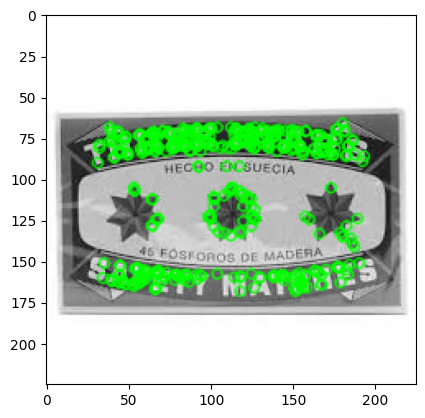

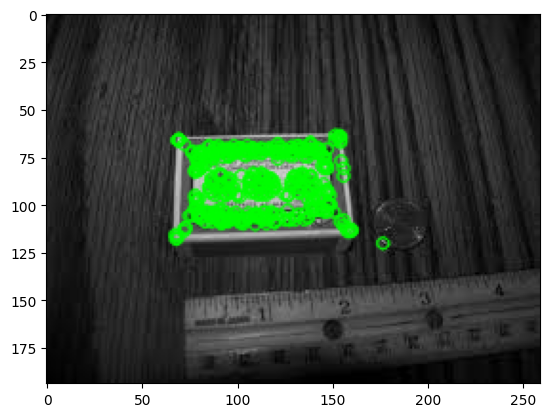

(<matplotlib.image.AxesImage at 0x222fbe4abe0>, None)

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename1 = r'Pictures/match.jpg'
filename2 = r'Pictures/match2.jpg'

img1 = cv.imread(filename1, cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(filename2, cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# draw only keypoints location,not size and orientation
img1 = cv.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
plt.imshow(img1), plt.show()

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img2, kp2, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

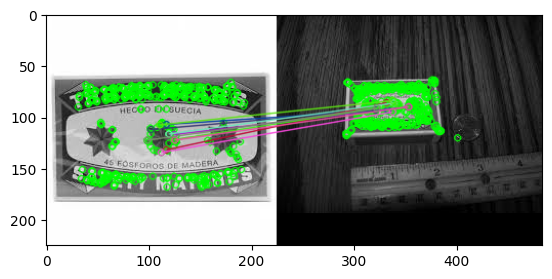

(<matplotlib.image.AxesImage at 0x222fba9cf40>, None)

In [8]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### Brute-Force Matching with SIFT Descriptors and Ratio Test

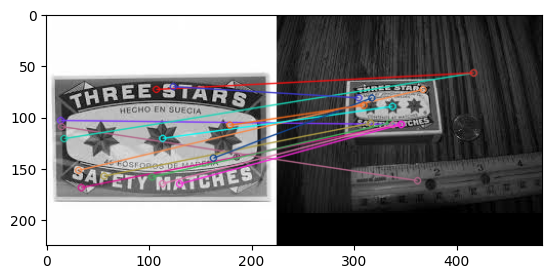

(<matplotlib.image.AxesImage at 0x222fbaa44f0>, None)

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename1 = r'Pictures/match.jpg'
filename2 = r'Pictures/match2.jpg'

img1 = cv.imread(filename1, cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(filename2, cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### FLANN based Matcher

#### Using SIFT

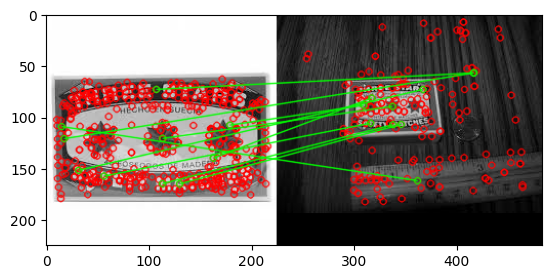

(<matplotlib.image.AxesImage at 0x222f882b520>, None)

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename1 = r'Pictures/match.jpg'
filename2 = r'Pictures/match2.jpg'

img1 = cv.imread(filename1, cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(filename2, cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1

index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

#### using ORB

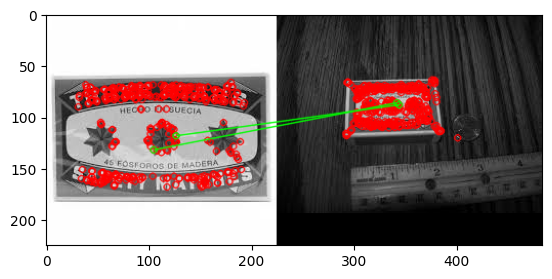

(<matplotlib.image.AxesImage at 0x222fbfffeb0>, None)

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename1 = r'Pictures/match.jpg'
filename2 = r'Pictures/match2.jpg'

img1 = cv.imread(filename1, cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(filename2, cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp1 = orb.detect(img1,None)
# compute the descriptors with ORB
kp1, des1 = orb.compute(img1, kp1)

# find the keypoints with ORB
kp2 = orb.detect(img2,None)
# compute the descriptors with ORB
kp2, des2 = orb.compute(img2, kp2)


FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i, match in enumerate(matches):
    if len(match) == 2:  # Check if match contains 2 elements
        m, n = match
        if m.distance < 0.7 * n.distance:
            matchesMask[i] = [1, 0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()


### Part Two
#### Feature Matching + Homography to find Objects

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10
filename1 = r'Pictures/match.jpg'
filename2 = r'Pictures/match2.jpg'

img1 = cv.imread(filename1, cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(filename2, cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []

for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [14]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

Not enough matches are found - 10/10


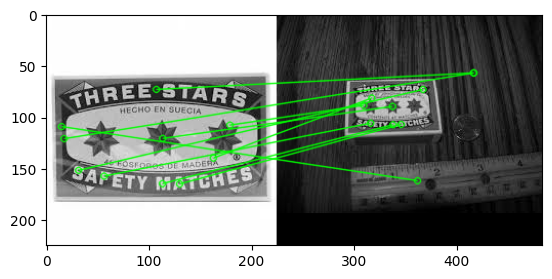

(<matplotlib.image.AxesImage at 0x222fbf64640>, None)

In [15]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()